In [5]:
import pandas as pd
import numpy as np
import requests
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

In [3]:
stats_combined = pd.read_csv('data/player_stats.csv')

In [3]:
stats_combined = stats_combined.drop(columns = ['Unnamed: 0'])

In [4]:
stats_combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,0.0,0.000,Phoenix Suns,59.0,23.0,0.720,0.0,110.6,106.8,3.86
1,Aaron Swinson,SF,24,PHO,9,0,5.7,1.1,2.0,0.556,...,0.0,0.000,Phoenix Suns,59.0,23.0,0.720,0.0,110.6,106.8,3.86
2,Antonio Lang,SF,22,PHO,12,0,4.4,0.3,0.8,0.400,...,0.0,0.000,Phoenix Suns,59.0,23.0,0.720,0.0,110.6,106.8,3.86
3,Charles Barkley,PF,31,PHO,68,66,35.0,8.1,16.8,0.486,...,1050.0,0.091,Phoenix Suns,59.0,23.0,0.720,0.0,110.6,106.8,3.86
4,Dan Majerle,SF,29,PHO,82,46,37.7,5.3,12.6,0.425,...,0.0,0.000,Phoenix Suns,59.0,23.0,0.720,0.0,110.6,106.8,3.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
13129,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
13130,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45
13131,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45


In [5]:
stats_combined.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [6]:
stats_combined.isnull().sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          52
3P            0
3PA           0
3P%        1838
2P            0
2PA           0
2P%          93
eFG%         52
FT            0
FTA           0
FT%         490
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W           605
L           605
W/L%        605
GB          605
PS/G        605
PA/G        605
SRS         605
dtype: int64

In [7]:
stats_combined.fillna(0, inplace=True)

In [8]:
stats_combined.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [9]:
stats_combined.corr()['Share']

Age        0.016576
G          0.088207
GS         0.164205
MP         0.156956
FG         0.265899
FGA        0.240147
FG%        0.059720
3P         0.096533
3PA        0.095569
3P%        0.027711
2P         0.267203
2PA        0.245175
2P%        0.054728
eFG%       0.052832
FT         0.309658
FTA        0.315244
FT%        0.038753
ORB        0.092778
DRB        0.201899
TRB        0.176099
AST        0.202695
STL        0.165186
BLK        0.134926
TOV        0.229885
PF         0.065075
PTS        0.277760
Year      -0.013186
Pts Won    0.996530
Pts Max    0.524644
Share      1.000000
W          0.112405
L         -0.088576
W/L%       0.115078
GB        -0.089644
PS/G       0.033658
PA/G       0.008455
SRS        0.122032
Name: Share, dtype: float64

In [10]:
stats_combined.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [11]:
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
            '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 
            'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']
target = ['Share']

In [12]:
df_train = stats_combined[(stats_combined["Year"] < 2022)]
df_test = stats_combined[stats_combined["Year"] == 2022]

In [13]:
model = Ridge()

In [15]:
model.fit(df_train[features],df_train["Share"])

Ridge()

In [17]:
pred = model.predict(df_test[features])
pred = pd.DataFrame(pred, columns=["predictions"], index=df_test.index)
pred

,predictions
548,0.100057
549,0.057668
550,0.080782
551,0.100642
552,0.081122
...,...
11252,0.068556
11253,0.076438
11254,0.091752
11255,0.090639


In [22]:
compared = pd.concat([df_test[["Player"]], pred], axis=1)

In [23]:
compared.sort_values("predictions", ascending=False).head(10)

,Player,predictions
10454,Giannis Antetokounmpo,0.299119
563,Nikola Jokić,0.267686
737,Joel Embiid,0.266072
7474,LeBron James,0.238483
10288,Luka Dončić,0.233753
5701,Kevin Durant,0.223077
10970,Ja Morant,0.202924
10596,Trae Young,0.200186
736,James Harden,0.187517
7464,Anthony Davis,0.185473


In [21]:
mean_squared_error(compared['Share'],compared['predictions'])

0.008997935808361557

In [40]:
score = df_train[df_train['G'] > 75].sort_values('AST', ascending = False).head()
score

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
1522,John Stockton,PG,32,UTA,82,82,35.0,5.2,9.6,0.542,...,1050.0,0.045,Utah Jazz,60.0,22.0,0.732,2.0,106.4,98.4,7.76
4969,Steve Nash,PG,32,PHO,76,76,35.3,6.8,12.8,0.532,...,1290.0,0.785,Phoenix Suns,61.0,21.0,0.744,0.0,110.2,102.9,7.28
10734,Chris Paul,PG,22,NOH,80,80,37.6,7.9,16.1,0.488,...,1260.0,0.710,New Orleans Hornets,56.0,26.0,0.683,0.0,100.9,95.6,5.46
8521,Mark Jackson,PG,31,IND,82,82,37.2,3.5,8.3,0.426,...,0.0,0.000,Indiana Pacers,39.0,43.0,0.476,30.0,95.4,94.4,1.49
1538,John Stockton,PG,33,UTA,82,82,35.5,5.4,10.0,0.538,...,1130.0,0.011,Utah Jazz,55.0,27.0,0.671,4.0,102.5,95.9,6.25


<AxesSubplot:xlabel='Player'>

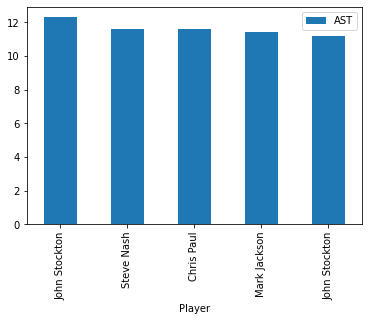

In [41]:
score.plot.bar("Player", "AST")